# NN_parabola  - This is a Multilayer Perceptron (MLP) example using Keras

    Copyright (C) 2020 Adrian Bevan, Queen Mary University of London

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.
    
----------------------

## The problem

Use an MLP to approximate the function $y=x^2$ to illustrate the ability of this algorithm to be a function approximator.



In [6]:
import tensorflow as tf
import random
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Ntrain = 100
Ntest  = 100
xmin   =-10
xmax   = 10
Noise  = 0.05
print("\033[92mGenerating the parabola data set\033[0m")
X_train = []
Y_train = []
X_test  = []
Y_test  = []


#--------------------------------------------------------------------
def sim_parabola(xmin, xmax, Noise):
    """
    Function to simulate a random data point for a parabola
    """
    x = random.random()*(xmax-xmin)+xmin
    y = x*x*(1+random.random()*Noise)
    
    return x, y
#--------------------------------------------------------------------
  
for i in range( Ntrain ):
  x,y = sim_parabola(xmin, xmax, Noise)
  X_train.append(x)
  Y_train.append(y)

for i in range( Ntest ):
  x,y = sim_parabola(xmin, xmax, Noise)
  X_test.append(x)
  Y_test.append(y)

# convert to nparrays
x_test  = np.array(X_test)
y_test  = np.array(Y_test)
x_train = np.array(X_train)
y_train = np.array(Y_train)

print("Have generated the following data:")
print("\tN(test)  = ", len(x_test))
print("\tN(train) = ", len(x_train))



Generating the parabola data set
Have generated the following data:
	N(test)  =  100
	N(train) =  100


---------------------
## Building the model 

**Training [Epochs, batches and validation data]** The number of training epochs specified is denoted by `Nepochs`.  1 epoch is required to run over all of the training data.  It is possible to run batches or mini-batches of data through the training; each batch requires the optimisation to be performed, and so when specifying the `BatchSize` the training will be performed by running the optimisation $N_{epochs}\timesN_{batches}$ times.  In general this leads to faster optimisation of the model than optimising over the full training set each time.

The training data will be split into training and validation samples according to the value of the variable `ValidationSplit`. 

**Dropout:** Coadaptation is the ability for an optimisation algorithm to allow weights to be learned where changes in one node can be compensated by changes in another node that limit the increase in performance.  This issue can be a problem for deep networks in particular where the optimisation process can involve millions of hyperparameters.  A way to combat this issue is to randomly drop-out nodes in the network each iteration of the optimisation.  That way no single paring of nodes can learn to co-adapt to the evolution of hyperparameters through the optimisation.  Thankfully all the user has to do is to set a dropout value via the variable `DropoutValue`. 

**NOTE:** this value is the fraction of nodes dropped from the model [In V1.X of TensorFlow the opposite convention was used].

**Loss:** The cross entropy loss function is used for this optimisation process.  The value of the loss function is converted into an output vector of 1's and 0's to be used for classification.

### Model configuration

The MLP consists of an input layer, two hidden layers, in this case one drop out layer and finally an output layer. These are as follows:
- **Inputs:** This model specifies an input shape of 28x28 that is flattened. The purpose of this is to ensure that there are 784 input features being fed into the hidden layers of the network.
- **Hidden Layers:** This network has two hidden layers, wich using a leaky ReLU (Rectified Linear Unit) activation function.  The parameter alpha defines the slope of the function for negative values, and for positive values the activation function is simply $f(x)=x$.
- **Dropout Layer:** Here the only dropout layer is the one from the second hidden layer of the network to the output.  You may wish to explore what happens if another dropout layer is added after the first hidden layer.
- **Output:** The output is a vector of 10 numbers. As the loss function is a cross entropy loss function the output in this case will be a one hot vector, i.e. a vector of 10 digits that are either 0 or 1.  The element corresponding to 1 being the optimal classificaiton of the example.




In [9]:
#
# Training configuration
#
ValidationSplit = 0.5
BatchSize       = 100
Nepochs         = 100
DropoutValue    = 0.2

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_dim=1, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
  tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
  tf.keras.layers.Dropout(DropoutValue),
  tf.keras.layers.Dense(1)
])


print("--------------------------------------------------------------------------------------------------------------")
print("\033[92mWill train a multilayer perceptron using some toy data following y = x^2\033[0m")
print("--------------------------------------------------------------------------------------------------------------\n\n")
print("Input data MNIST")
print("2 layer MLP with configuration 1:128:128:1")
print("Dropout values       = ", DropoutValue)
print("Leaky relu parameter =  0.1")
print("ValidationSplit      = ", ValidationSplit)
print("BatchSize            = ", BatchSize)
print("Nepochs              = ", Nepochs)

# now specify the loss function 
loss_fn = tf.keras.losses.MeanSquaredError()

# now we can train the model to make predictions.
#   Use the ADAM optimiser
#   Specify the metrics to report as accuracy
#   Specify the loss function (see above)
# the fit step specifies the number of training epochs
model.compile(optimizer='adam', loss=loss_fn)
history  = model.fit(x_train, y_train, validation_split=ValidationSplit, batch_size=BatchSize, epochs=Nepochs)



--------------------------------------------------------------------------------------------------------------
Will train a multilayer perceptron using some toy data following y = x^2
--------------------------------------------------------------------------------------------------------------


Input data MNIST
2 layer MLP with configuration 1:128:128:1
Dropout values       =  0.2
Leaky relu parameter = 0.1
ValidationSplit      =  0.5
BatchSize            =  100
Nepochs              =  100
Train on 50 samples, validate on 50 samples
Epoch 1/100
50/50 [==============================] - 0s 5ms/sample - loss: 2013.4424 - val_loss: 2061.4810
Epoch 2/100
50/50 [==============================] - 0s 61us/sample - loss: 1978.7794 - val_loss: 2033.8577
Epoch 3/100
50/50 [==============================] - 0s 68us/sample - loss: 1951.7681 - val_loss: 2006.9692
Epoch 4/100
50/50 [==============================] - 0s 70us/sample - loss: 1926.8466 - val_loss: 1981.2780
Epoch 5/100
50/50 [==========

------------
## Output

When training a model we are interested in studying the accuracy of prediction (in this case how close is the predicted model, $\widehat{y}$ value to the function that we are trying to approximate, $x^2$), and about the evolution of the loss function for both the test and train samples of examples.  If the test and train sample loss functions are signficantly different that points toward a problem... the model could be under or over trained.

This information is stored in the 'history' variable.  See the note regarding key value differences between TF1.0 and TF2.0 (here we use the TF2.0 convention).

Display the evolution of the loss as a function of the training epoch

  N(Epochs)        =  100


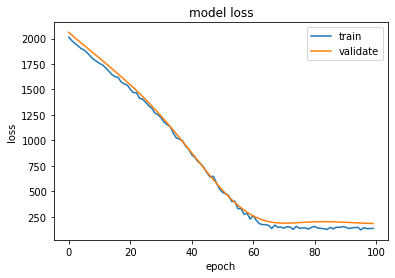

100/100 - 0s - loss: 159.7873
loss = 159.787

Display the model prediction against the ground truth from test data



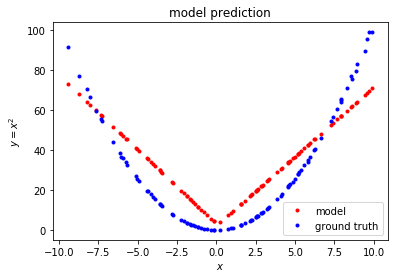


Display the difference between the model prediction and the ground truth from test data



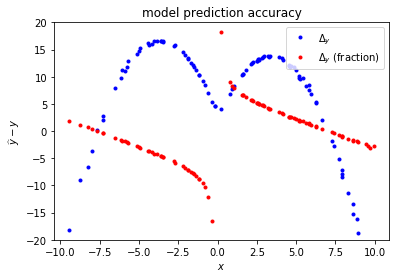

In [19]:
import matplotlib.pyplot as plt

print("\033[1mDisplay the evolution of the loss as a function of the training epoch\033[0m\n")
print("  N(Epochs)        = ", Nepochs)
#print("  loss (train)     = ", history.history['loss'])
#print("  loss (test)      = ", history.history['val_loss'])

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.clf()

# having finished training the model, use this to evaluate the performance on an
# independent sample of test data
loss = model.evaluate(x_test,  y_test, verbose=2)
print("loss = {:5.3f}".format(loss))

print("\n\033[1mDisplay the model prediction against the ground truth from test data\033[0m\n")

#
# use the model to make predictions based on the unseen test data
#
y_predict = model.predict(x_test)
plt.plot(x_test, y_predict, "r.")
plt.plot(x_test, y_test, "b.")
plt.title('model prediction')
plt.ylabel('$y=x^{2}$')
plt.xlabel('$x$')
plt.legend(['model', 'ground truth'], loc='lower right')
plt.show()
plt.clf()

print("\n\033[1mDisplay the difference between the model prediction and the ground truth from test data\033[0m\n")

delta = []
deltapc = []
for i in range(len(y_predict)):
    thedelta = y_predict[i]-y_test[i]
    delta.append( thedelta )
    if( x_test[i] ):
       deltapc.append( thedelta /  x_test[i] )
    else:
       deltapc.append( 0.0 )
    
plt.plot(x_test, delta, "b.")
plt.plot(x_test, deltapc, "r.")
plt.legend(['$\Delta_y$', '$\Delta_y$ (fraction)'], loc='upper right')
plt.title('model prediction accuracy')
plt.ylabel('$\widehat{y}-y$')
plt.xlabel('$x$')
plt.ylim(-20, 20)
plt.show()

----------------------
## Suggested exercises:

 - Explore the effect of DropOut, ValidationSplit, Nepochs, and BatchSize have on the training (try to find a model where the test and train loss function values are similar.
 - Explore how the neural network structure affects the training performance (e.g. add double or halve the number of nodes in the hidden layers, the current value is 128 for both)
 - Explore the effect of adding a second dropout layer into the network after the first hidden layer.
 - Explore what happens when the model is reduced to a single layer percpetron (removing the second hidden layer).
 - Explore what happens when the model is changed by adding a third hidden layer to it.